In [3]:
# !pip install plotly==5.22.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 6.9 MB/s eta 0:00:0000:0100:01m


In [30]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [17]:
# Sample data
nodes = [0, 1, 3]
time = [0, 1.34, 2.5674]

# create a pd from the data
df = pd.DataFrame({'nodes': nodes, 'time': time})

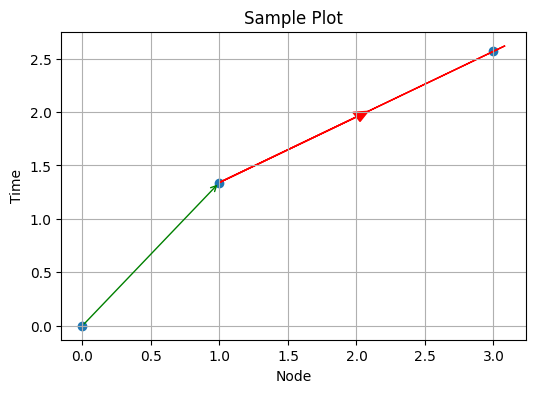

In [72]:


# Create the plot
plt.figure(figsize=(6, 4))  # Set the figure size
plt.scatter(nodes, time)  # Create a scatter plot

# Set axis labels and title
plt.xlabel("Node")
plt.ylabel("Time")
plt.title("Sample Plot")

# Using arrow to connect nodes[0] and nodes[1], using slight offset for better visibility
# Reduce the linewidth and change the color to green
# Set the arrow to middle of the line
plt.annotate("", xy=(nodes[1], time[1]), xytext=(nodes[0], time[0]),
                arrowprops=dict(arrowstyle="->", color="green", lw=1), xycoords='data', textcoords='data')

# Using matplotlib.pyplot.arrow to draw arrow in middle of nodes[1] and nodes[2]
# Set the arrow color to red
plt.arrow(nodes[1], time[1], (nodes[2] - nodes[1])/2, (time[2] - time[1])/2, head_width=0.1, head_length=0.1, fc='red', ec='red')
plt.arrow(nodes[1], time[1], nodes[2] - nodes[1], time[2] - time[1], head_width=0, head_length=0.1, fc='red', ec='red')

# Display the plot
plt.grid(True)  # Add a grid
plt.show()




In [29]:
# Using Plotly

# Create a scatter plot
fig = px.scatter(df, x='nodes', y='time', title='Sample Plot')  

# Add an arrow to connect all the points, change the arrow style to arrow-bar-up
fig.add_annotation(x=nodes[0], y=time[0], xref="x", yref="y",
                   ax=nodes[1], ay=time[1], axref="x", ayref="y",
                   arrowhead=1, arrowsize=1, arrowwidth=2, arrowcolor="green",
                   )
# Show the plot
fig.show()

In [55]:
# Sample data for scatter plot
x = [1, 2, 3, 4, 5]
y = [4, 6, 2, 8, 1]

# Define starting and ending points for arrows (modify as needed)
start_arrows = [(2, 6), (4, 8)]  # Adjust these for your data points
end_arrows = [(3, 2), (5, 1)]  # Adjust these for your data points

# Create scatter plot with markers
trace1 = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(size=10, color='blue')  # Adjust marker size and color
)

# Draw arrows between points
arrow_annotations = []
for start, end in zip(start_arrows, end_arrows):
    mid_point = ((start[0]+end[0])/2, (start[1]+end[1])/2)  # Calculate mid point

    # Arrow from start to mid point
    arrow_annotations.append(
        dict(
            x=start[0],
            y=start[1],
            xref='x',
            yref='y',
            ax=mid_point[0],
            ay=mid_point[1],
            axref='x',
            ayref='y',
            showarrow=True,
            arrowhead=7,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor='green',  # Adjust arrow color
        )
    )

    # Arrow from mid point to end
    arrow_annotations.append(
        dict(
            x=mid_point[0],
            y=mid_point[1],
            xref='x',
            yref='y',
            ax=end[0],
            ay=end[1],
            axref='x',
            ayref='y',
            showarrow=True,
            arrowhead=3,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor='green',  # Adjust arrow color
        )
    )
# Combine the scatter plot and annotations in a layout
layout = go.Layout(
    title='Scatter Plot with Arrows',
    xaxis=dict(title='X-axis'),
    yaxis=dict(title='Y-axis'),
    annotations=arrow_annotations
)

fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [107]:
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 326.4 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [63 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-13.4-arm64-cpython-310
      creating build/lib.macosx-13.4-arm64-cpython-310/pygraphviz
      copying pygraphviz/scraper.py -> build/lib.macosx-13.4-arm64-cpython-310/pygraphviz
      copying pygraphviz/graphviz.py -> build/lib.macosx-13.4-arm64-cpython-310/pygraphviz
      copying pygraphviz/__init__.py -> build/lib.macosx-13.4-arm64-cpython-310/pygraphviz
      copying pygraphviz/agraph.py -> build/lib.macosx-13.4-arm64-cpython-310/pygraphvi

In [106]:
from graphviz import Digraph

# Create a directed graph
dot = Digraph()

# Define edges (example)
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)]

# Define positions for the nodes (example)
positions = {
    1: (0, 0),
    2: (1, 2),
    3: (2, 0),
    4: (3, 2),
    5: (4, 0)
}

# Add nodes to the graph
for node, pos in positions.items():
    dot.node(str(node), pos=f"{pos[0]},{pos[1]}!")

# Add edges to the graph
for edge in edges:
    dot.edge(str(edge[0]), str(edge[1]), arrowhead='normal', arrowtail='none', dir='both')

# Render the graph
dot.render('directed_graph', format='png', cleanup=True)
dot.view()

'directed_graph.pdf'

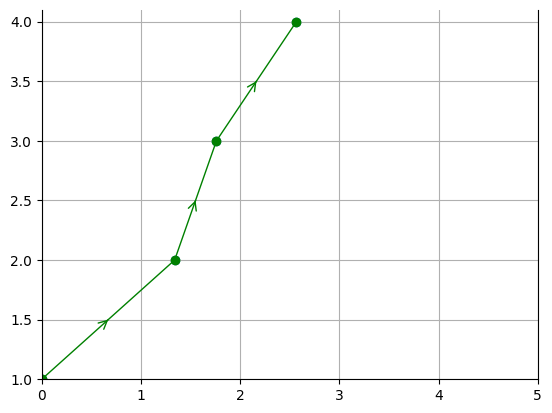

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame.from_dict({'x' : [0, 1.34, 1.76127, 2.5674],
                            'y' :  [1,2,3,4]})
x = df['x']
y = df['y']
# calculate position and direction vectors:
x0 = x.iloc[range(len(x)-1)].values
x1 = x.iloc[range(1,len(x))].values
y0 = y.iloc[range(len(y)-1)].values
y1 = y.iloc[range(1,len(y))].values
xpos = (x0+x1)/2
ypos = (y0+y1)/2
xdir = x1-x0
ydir = y1-y0
fig, ax = plt.subplots()

# show grid 
ax.grid(True)

# Set the x from 0 to 5
ax.set_xlim(0, 5)
# Set the y from 0 to 4
ax.set_ylim(1, 4.1)

# remove top border
ax.spines['top'].set_visible(False)
ax.scatter(x,y)

# plot the line, color is green, node is green, linewidth is 2  
ax.plot(x,y, color='g', marker='o', linewidth=1)

# plot arrow on each line:
for X,Y,dX,dY in zip(xpos, ypos, xdir, ydir):
    ax.annotate("", xytext=(X,Y),xy=(X+0.001*dX,Y+0.001*dY),
    arrowprops=dict(arrowstyle="->", color='g'), size = 15,
    
    )

plt.show()